# 第三章 模型搭建和评估-评估  
根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
cdf = pd.read_csv('clear_data.csv')
df = pd.read_csv('train.csv')
from sklearn.model_selection import train_test_split
X = cdf
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型评估
模型评估是为了知道模型的泛化能力。  
交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。  
在交叉验证中，数据被多次划分，并且需要训练多个模型。  
最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。  
准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例  
召回率（recall）度量的是正类样本中有多少被预测为正类  
f-分数是准确率与召回率的调和平均  
【思考】：将上面的概念进一步的理解，大家可以做一下总结

In [5]:
from sklearn.model_selection import KFold

In [6]:
KFold?

In [7]:
kf = KFold(n_splits= 10, random_state= 42, shuffle= True)
kf.get_n_splits(X)

10

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
cross_val_score?

In [12]:
from sklearn.linear_model import LogisticRegression

In [15]:
clf = LogisticRegression()
print(cross_val_score(clf, X_train, y_train, cv=10))

C:\Users\Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.81944444 0.76388889 0.70422535 0.95774648 0.83098592 0.74647887
 0.74647887 0.73239437 0.74647887 0.88732394]


C:\Users\Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### 任务二：混淆矩阵  
计算二分类问题的混淆矩阵  
计算精确率、召回率以及f-分数  
【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

In [17]:
from sklearn import metrics as ms
from sklearn.metrics import classification_report as cr

In [21]:
clf.fit(X_train, y_train)
X_train_predict = clf.predict(X_train)
X_test_predict = clf.predict(X_test)

C:\Users\Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
ms.confusion_matrix(y_train, X_train_predict)

array([[388,  56],
       [ 85, 183]], dtype=int64)

In [41]:
print(cr(y_train, X_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.77      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [26]:
print(cr(y_test, X_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### 任务三：ROC曲线
绘制ROC曲线  
【思考】什么是ROC曲线，OCR曲线的存在是为了解决什么问题？

In [27]:
ms.roc_curve?

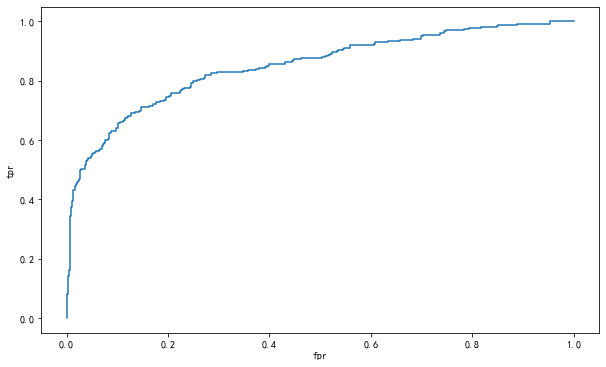

In [49]:
fpr, tpr, thresholds = ms.roc_curve(y_train, clf.decision_function(X_train))
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [50]:
from sklearn.metrics import plot_roc_curve as prc

In [51]:
prc?

In [58]:
clf = LogisticRegression(random_state= 42, C = 0.5, class_weight= 'balanced').fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

C:\Users\Li\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Li\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Li\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


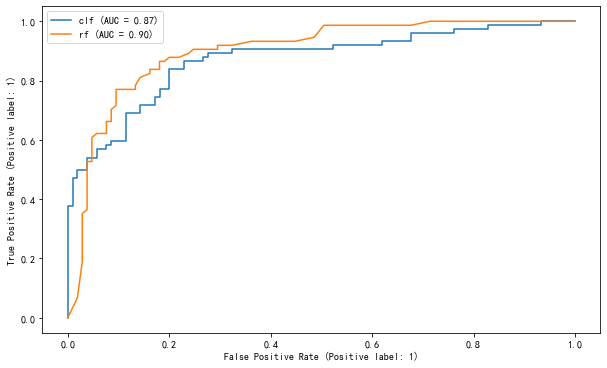

In [63]:
clf_curve = prc(clf, X_test, y_test, response_method = 'decision_function', name = 'clf')
re_curve = prc(rf, X_test, y_test,  name = 'rf', ax = clf_curve.ax_)
plt.legend()

In [83]:
rf.predict_proba(X_test)

array([[0.69, 0.31],
       [0.89, 0.11],
       [0.83, 0.17],
       [0.01, 0.99],
       [0.74, 0.26],
       [0.08, 0.92],
       [0.25, 0.75],
       [0.89, 0.11],
       [0.22, 0.78],
       [0.13, 0.87],
       [0.7 , 0.3 ],
       [0.98, 0.02],
       [0.89, 0.11],
       [0.96, 0.04],
       [0.86, 0.14],
       [0.01, 0.99],
       [0.61, 0.39],
       [0.38, 0.62],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.39, 0.61],
       [0.73, 0.27],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.84, 0.16],
       [0.94, 0.06],
       [0.86, 0.14],
       [0.53, 0.47],
       [0.99, 0.01],
       [0.46, 0.54],
       [0.51, 0.49],
       [0.37, 0.63],
       [0.59, 0.41],
       [0.66, 0.34],
       [0.41, 0.59],
       [0.46, 0.54],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.92, 0.08],
       [0.83, 0.17],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [0.47, 0.53],
       [0.91, 0.09],
       [0.76, 0.24],
       [0.99,

In [74]:
clf.decision_function(X_test)

array([-1.36429658e+00, -8.25900860e-01, -1.06867343e+00,  2.44444674e+00,
        1.46804961e+00,  2.83915660e+00,  7.03414144e-01, -1.58807455e+00,
        1.00090943e+00,  2.33365428e+00, -4.37944934e-01, -1.72715470e+00,
        3.73190846e-01, -1.22595250e+00, -9.80339933e-01,  2.97200030e+00,
       -3.45668970e-01,  8.63311382e-01, -5.12668361e-01, -4.83718001e-01,
       -1.41454038e+00, -1.34313839e-01,  1.03386782e+00, -1.13370195e+00,
       -1.41300024e+00, -1.74253335e+00, -1.02542439e-01, -7.07920300e-01,
       -1.93563936e+00,  1.04836133e+00, -1.02734630e+00,  1.15538388e+00,
        5.11759837e-01,  1.00631898e+00, -1.30594719e+00, -1.16571759e+00,
       -1.33568066e-01,  6.57323620e-01,  3.11821605e+00, -1.35451814e+00,
       -8.52650341e-01, -1.67909113e+00, -1.30947991e+00, -1.66544264e+00,
        9.05912790e-01, -1.92776474e+00, -1.39207373e+00, -1.35797515e+00,
       -1.45663949e+00, -1.96575799e-01,  1.51969238e+00,  2.11167605e+00,
       -2.60555410e+00,  

In [97]:
clf_fpr, clf_tpr, clf_thresholds = ms.roc_curve(y_test, clf.decision_function(X_test))
rf_fpr, rf_tpr, rf_thresholds = ms.roc_curve(y_test, rf.predict_proba(X_test)[:,1])

In [104]:
a = np.argmin(np.abs(clf_thresholds))
b = np.argmin(np.abs(rf_thresholds))

C:\Users\Li\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Li\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


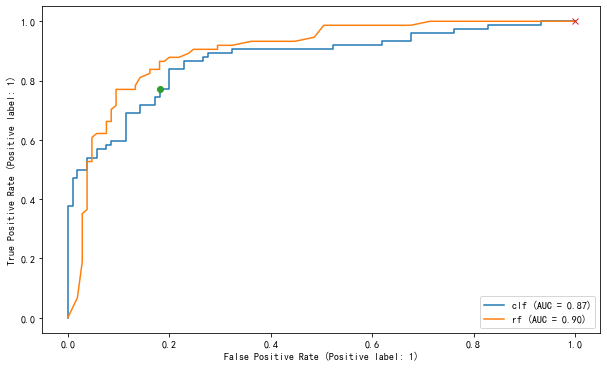

In [110]:
clf_curve = prc(clf, X_test, y_test, response_method = 'decision_function', name = 'clf')
re_curve = prc(rf, X_test, y_test,  name = 'rf', ax = clf_curve.ax_)
plt.plot(clf_fpr[a], clf_tpr[a], 'o')
plt.plot(rf_fpr[b], rf_tpr[b], 'x')